MachineLearning - Week 4 Assignment

In [15]:
#Importing input
import numpy as np
import pandas as pd
df=pd.read_csv("Week4 Dataset1.csv", skiprows=[0], names=["X1","X2","y"])
print(df.head())
X1=df.iloc[:,0]
X2=df.iloc[:,1]
X=np.column_stack((X1,X2))
y=df.iloc[:,2]

#Knowing the input data
print(np.shape(df))
print(min(X1), max(X1))
print(min(X2), max(X2))
print(min(y), max(y))

     X1    X2  y
0 -0.87  0.08  1
1 -0.68 -0.47 -1
2 -0.44  0.17  1
3  0.24  0.37  1
4 -0.66  0.39 -1
(1290, 3)
-1.0 1.0
-1.0 1.0
-1 1


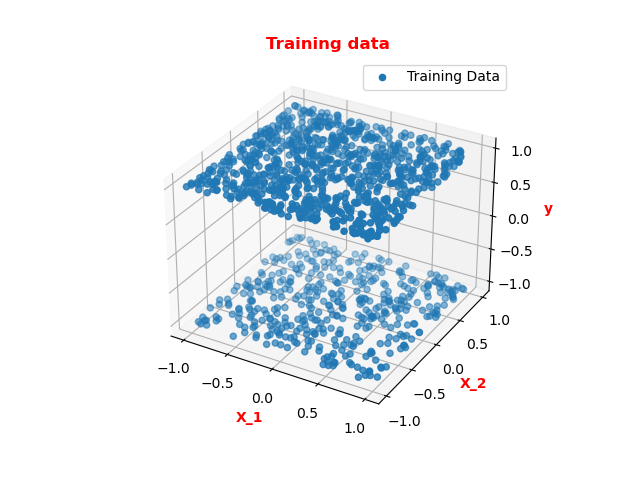

In [16]:
#Visualizing the input datsets
%matplotlib widget
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1,X2,y, label = "Training Data")
ax.set_xlabel("X_1", fontweight ='bold').set_color('red')
ax.set_ylabel("X_2", fontweight ='bold').set_color('red')
ax.set_zlabel("y", fontweight ='bold').set_color('red')
ax.legend()
# ax.view_init(0, 90)
ax.set_title("Training data", fontweight ='bold').set_color('red')

In [ ]:
def addPoly(X, y, n=5, gridRange=2):
    #Splitting the model into train, and test
    from sklearn.model_selection import train_test_split
    Xtrain, Xtest, ytrain, ytest = train_test_split(X,y) #### Return ytrain, ytest
    #Adding extra polynomial features equal to all combinations of powers of the two features up to power n
    from sklearn.preprocessing import PolynomialFeatures
    Xtrain_poly = PolynomialFeatures(n).fit_transform(Xtrain) #### Return Xtrain_poly
    Xtest_poly = PolynomialFeatures(n).fit_transform(Xtest) #### Return Xtest_poly
    X_poly = PolynomialFeatures(n).fit_transform(X)
    #Grid of feature values, to use for predictions
    Xt=[]
    grid=np.linspace(-gridRange,gridRange)
    for i in grid:
        for j in grid:
            Xt.append([i,j])
    Xt = np.array(Xt) #### Return Xt
    Xtest = PolynomialFeatures(n).fit_transform(Xt) #### Return Xtest
    return Xtrain_poly, Xtest_poly, ytrain, ytest

50